In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

# **Datasets Reading** 

In [2]:
# x_train = pd.read_csv('../Extremely Imbalance Data/Extremely Imbalance 70-30 X_Train.csv')

# x_test = pd.read_csv('../Extremely Imbalance Data/Extremely Imbalance 70-30 X_Test.csv')

# y_train = pd.read_csv('../Extremely Imbalance Data/Extremely Imbalance 70-30 Y_Train.csv')

# y_test = pd.read_csv('../Extremely Imbalance Data/Extremely Imbalance 70-30 Y_Test.csv')

In [3]:
x_train = pd.read_csv('../Moderetely Imbalance Data/Moderate Imbalance LMCH 70-30 X_Train.csv')

x_test = pd.read_csv('../Moderetely Imbalance Data/Moderate Imbalance LMCH 70-30 X_Test.csv')

y_train = pd.read_csv('../Moderetely Imbalance Data/Moderate Imbalance LMCH 70-30 Y_Train.csv')

y_test = pd.read_csv('../Moderetely Imbalance Data/Moderate Imbalance LMCH 70-30 Y_Test.csv')

In [4]:
x_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.896617,0.032034,-0.054052,-0.128564,-0.720501,-0.816991,-0.855640,-0.480919,-0.473748,-0.451293,-1.114137
1,0.896617,-1.966008,2.181869,1.504902,0.461613,0.264700,-0.855640,1.386073,1.596949,-0.141839,-1.114137
2,0.896617,0.531544,-0.721925,-0.496462,-0.072245,-0.044354,-0.769694,0.219203,0.250996,-0.451293,0.657481
3,-1.115304,1.930174,2.559363,2.358425,1.376799,0.496491,1.464903,0.452577,-0.266678,0.291397,1.004102
4,0.896617,0.431642,-0.402507,0.106890,2.406382,3.119648,-0.769694,0.919325,-0.163143,0.477069,1.774371
...,...,...,...,...,...,...,...,...,...,...,...
179,-1.115304,0.032034,0.178251,0.077458,-1.101829,-0.121618,-0.769694,1.386073,1.596949,-0.018057,-0.921570
180,-1.115304,-0.567379,-0.489621,-0.746633,-0.987430,0.496491,-0.254017,-0.714293,1.079275,-0.203730,-0.343869
181,0.896617,0.831251,3.582000,4.342622,0.842941,1.500918,0.691389,-0.247545,1.804019,0.043833,1.196669
182,-1.115304,0.531544,0.265365,1.254732,0.042153,-0.507936,0.175713,-0.480919,-0.577283,-0.141839,1.196669


In [5]:
print(y_train['Class'].value_counts())

2    91
0    64
1    29
Name: Class, dtype: int64


In [6]:
# Feature distribution
%matplotlib inline
import matplotlib.pyplot as plt

# Feature Importance using RF

In [7]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier()
# rfc.fit(x_train, y_train)
# #rfc.fit(x_train_smt, y_train_smt)

# feature_importance = pd.Series(rfc.feature_importances_, index= x_train.columns)
# feature_importance.sort_values(ascending=True)

# **Feature Ranking**

In [8]:
# feature_importance.nlargest(10).plot(kind='barh')

# **Ranking wise Feature Lists**

In [9]:
feature_lists = [
    ['HbA1c', 'BMI', 'AGE', 'Chol'],
    ['HbA1c', 'BMI', 'AGE', 'Chol', 'TG'],
    ['HbA1c', 'BMI', 'AGE', 'Chol', 'TG', 'VLDL', 'LDL'],
    ['HbA1c', 'BMI', 'AGE', 'Chol', 'TG', 'VLDL', 'LDL', 'Cr', 'Urea'],
    ['HbA1c', 'BMI', 'AGE', 'Chol', 'TG', 'VLDL', 'LDL', 'Cr', 'Urea', 'HDL']
]

In [10]:
FS_algorithm = 'RF'

metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics
results_df = pd.DataFrame()

In [11]:
for i, features in enumerate(feature_lists):
    X_train = x_train[features]
    feature_no = len(features)
    # print(X_train)
    performance_dict['Feature No'] = feature_no
#     for metric in metrics:
#         value = results_df.loc[results_df['Metrics'] == metric, model_name].values[0]
#         performance_dict[f'Feature No_{feature_no}'].append(feature_no)
#         performance_dict[f'Model Name_{feature_no}'].append(model_name)
#         performance_dict[metric] = value

# # Printing the performance dictionary
# for key, value in performance_dict.items():
#     print(f'{key}: {value}')

In [12]:
performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'Feature No': 10}

In [13]:
demo = {
    'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'Feature No': [4, 5, 7, 9, 10, 11],
    'Model': ['SVC', 'LR', 'KNN', 'LR', 'KNN', 'LR']
}

In [14]:
demoDf = pd.DataFrame.from_dict(demo)
demoDf

,Metrics,Feature No,Model
0,Accuracy,4,SVC
1,Precision,5,LR
2,Recall,7,KNN
3,F1 Score,9,LR
4,Cohen Kappa,10,KNN
5,AUC,11,LR


In [15]:
performance_dict_df = pd.DataFrame.from_dict(performance_dict)
performance_dict_df

,Metrics,Feature No
0,Accuracy,10
1,Precision,10
2,Recall,10
3,F1 Score,10
4,Cohen Kappa,10
5,AUC,10


In [16]:
hyper_params = {}
i = 0
j = 0
svc_param = []
lr_param = []
knn_param = []
column = ["Feature 4", "Feature 5", "Feature 7", "Feature 9"]
hyper_params['Column'] = column

In [17]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics

metrics_grid = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict_grid = {}
performance_dict_grid['Metrics'] = metrics_grid

# SMOTETomek Balancing

In [18]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_train)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_train_smt, y_train_smt = smtt.fit_resample(x_train, y_train)
# counter = Counter(y_train_smt)
# print('After', counter)


In [19]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_test)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_test_smt, y_test_smt = smtt.fit_resample(x_test, y_test)
# counter = Counter(y_test_smt)
# print('After', counter)


# Support Vector Classifier Train, Test 

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train, y_train)
#modelSVC.fit(x_test, y_test)
#print(modelSVC.score(x_test, y_test))

y_pred_svc = modelSVC.predict(x_test)
#y_pred = modelSVC.predict(x_train)
svc_acc = accuracy_score(y_test, y_pred_svc)
#ac = accuracy_score(y_train, y_pred)
print(svc_acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.9
[[31  0  1]
 [ 2  7  2]
 [ 1  2 34]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        32
           1       0.78      0.64      0.70        11
           2       0.92      0.92      0.92        37

    accuracy                           0.90        80
   macro avg       0.87      0.84      0.85        80
weighted avg       0.90      0.90      0.90        80



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, modelSVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



Y_pred_svc = modelSVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_svc)
f1 = f1_score(y_test, Y_pred_svc, average = "weighted")
precision = precision_score(y_test, Y_pred_svc, average = "weighted")
recall = recall_score(y_test, Y_pred_svc, average = "weighted")

pred_prob = modelSVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8966503267973855
f1 Score  0.8970075757575758
Recall  0.9
Specificity/TNR: 1.0
Cohen Kappa: 0.8335067637877211
AUC Score  0.9786978388588286


In [22]:
svc_performances = [svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict['SVC'] = svc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9,
  0.8966503267973855,
  0.9,
  0.8970075757575758,
  0.8335067637877211,
  0.9786978388588286]}

# Supper Vector Classifier Hyperparameter Tuning GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV
GSCV_SVC = GridSearchCV(modelSVC,{
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf', 'linear', 'poly', 'sigmoid']
}, 
cv = 10, 
return_train_score = False
)
GSCV_SVC.fit(x_train, y_train)
GSCV_SVC.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.03106763, 0.01416144, 0.0124651 , 0.01156905, 0.01466067,
        0.01216631, 0.01178365, 0.00997343, 0.01381621, 0.01396186,
        0.01166816, 0.0130645 , 0.01800289, 0.01316381, 0.01007228,
        0.01446254, 0.01705031, 0.01107037, 0.01595705, 0.02358811,
        0.02254977, 0.0126652 , 0.01266561, 0.01026602, 0.0152169 ,
        0.01515937, 0.01341512, 0.00987291, 0.01366308, 0.02543137,
        0.01766148, 0.02369535, 0.01940539, 0.0124681 , 0.0098712 ,
        0.01247821, 0.01675525, 0.01196687, 0.01017256, 0.01595666,
        0.0323132 , 0.01538591, 0.01056576, 0.01032233, 0.02074425,
        0.02214067, 0.01570847, 0.01047118, 0.01239004, 0.0148598 ,
        0.01296501, 0.01326411, 0.01825032, 0.01645429, 0.01176872,
        0.01526642, 0.01655483, 0.01486006, 0.01047163, 0.01306314,
        0.02366614, 0.01585674, 0.01146829, 0.00997188, 0.01440444,
        0.01585717, 0.01246572, 0.00922589, 0.01316414, 0.01904829,
        0.01186736, 0.01221795,

In [24]:
df_svc_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_svc_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031068,0.006698,0.004189,0.002176,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.736842,0.631579,...,0.631579,0.666667,0.555556,0.777778,0.722222,0.666667,0.666667,0.673977,0.059108,306
1,0.014161,0.002265,0.002895,0.001137,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.947368,0.842105,...,0.842105,0.777778,0.833333,0.888889,0.888889,0.944444,0.833333,0.869298,0.050595,92
2,0.012465,0.002241,0.003193,0.001074,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.894737,0.842105,...,0.842105,0.777778,0.722222,0.888889,0.666667,0.833333,0.722222,0.803216,0.073194,204
3,0.011569,0.001352,0.002294,0.000457,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.631579,0.684211,...,0.789474,0.777778,0.833333,0.722222,0.611111,0.722222,0.722222,0.723099,0.064937,267
4,0.014661,0.002094,0.002493,0.000804,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.842105,0.736842,...,0.894737,0.777778,0.722222,0.888889,0.666667,0.777778,0.833333,0.803509,0.075773,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.018204,0.001761,0.003990,0.000892,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.789474,0.789474,...,0.842105,0.833333,0.833333,0.777778,0.777778,0.777778,0.777778,0.804094,0.027924,181
396,0.024837,0.005791,0.003590,0.001017,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.789474,0.789474,...,0.789474,0.833333,0.777778,0.777778,0.777778,0.777778,0.777778,0.793275,0.022876,253
397,0.060137,0.035682,0.003492,0.001201,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.894737,0.842105,...,0.842105,0.833333,0.888889,0.888889,0.888889,0.944444,0.888889,0.880702,0.031541,61
398,0.014760,0.003116,0.003093,0.000537,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.473684,0.473684,...,0.473684,0.555556,0.500000,0.500000,0.500000,0.500000,0.500000,0.495029,0.023684,316


In [25]:
df_svc_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.673977
1,1,linear,0.869298
2,1,poly,0.803216
3,1,sigmoid,0.723099
4,1,rbf,0.803509
...,...,...,...
395,20,sigmoid,0.804094
396,20,rbf,0.793275
397,20,linear,0.880702
398,20,poly,0.495029


In [26]:
print(GSCV_SVC.best_score_)
gscv_svc_acc = GSCV_SVC.best_score_
print(GSCV_SVC.best_params_)

0.891812865497076
{'C': 16, 'gamma': 1, 'kernel': 'linear'}


In [27]:
grid_predictions = GSCV_SVC.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.77      0.91      0.83        11
           2       0.94      0.89      0.92        37

    accuracy                           0.93        80
   macro avg       0.89      0.92      0.91        80
weighted avg       0.93      0.93      0.93        80



In [28]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, GSCV_SVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



y_pred_svc_grid = GSCV_SVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, y_pred_svc_grid)
f1 = f1_score(y_test, y_pred_svc_grid, average = "weighted")
precision = precision_score(y_test, y_pred_svc_grid, average = "weighted")
recall = recall_score(y_test, y_pred_svc_grid, average = "weighted")

pred_prob = GSCV_SVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9293406593406595
f1 Score  0.9260416666666668
Recall  0.925
Specificity/TNR: 1.0
Cohen Kappa: 0.8781107160995429
AUC Score  0.9821878562814009


In [29]:
svc_performances_grid = [gscv_svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['SVC'] = svc_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.891812865497076,
  0.9293406593406595,
  0.925,
  0.9260416666666668,
  0.8781107160995429,
  0.9821878562814009]}

# Logistic Regression Train, Test

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

y_pred_lr = modelLR.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred_lr)

print("Training Accuracy: {:.3f}".format(modelLR.score(x_train, y_train)))
print("Testing Accuracy: {:.3f}".format(modelLR.score(x_test, y_test)))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.886
Testing Accuracy: 0.925
[[30  1  1]
 [ 0 10  1]
 [ 0  3 34]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.71      0.91      0.80        11
           2       0.94      0.92      0.93        37

    accuracy                           0.93        80
   macro avg       0.89      0.92      0.90        80
weighted avg       0.94      0.93      0.93        80



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, modelLR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr = modelLR.predict(x_test)
pred_prob = modelLR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr)
f1 = f1_score(y_test, Y_pred_lr, average = "weighted")
precision = precision_score(y_test, Y_pred_lr, average = "weighted")
recall = recall_score(y_test, Y_pred_lr, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9350198412698413
f1 Score  0.9279186920017676
Recall  0.925
Specificity/TNR: 0.967741935483871
Cohen Kappa: 0.8786039453717754
AUC Score  0.9637349640450154


In [32]:
rfc_performances = [lr_ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['LR'] = rfc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9,
  0.8966503267973855,
  0.9,
  0.8970075757575758,
  0.8335067637877211,
  0.9786978388588286],
 'LR': [0.925,
  0.9350198412698413,
  0.925,
  0.9279186920017676,
  0.8786039453717754,
  0.9637349640450154]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [33]:
from sklearn import linear_model

C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = linear_model.LogisticRegression()
GSCV_LR = GridSearchCV(logistic, hyperparameters, cv = 10)
GSCV_LR.fit(x_train, y_train)
GSCV_LR.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.00548515, 0.02293839, 0.00588362, 0.01336379, 0.00578358,
        0.01894829, 0.00398886, 0.01286516, 0.00608325, 0.02553034,
        0.00418859, 0.01286509, 0.00598304, 0.02024584, 0.00448701,
        0.02034481, 0.01057122, 0.02602689, 0.00488658, 0.02692776,
        0.00618358, 0.0184499 , 0.00548272, 0.01425877, 0.00578384,
        0.01974664, 0.00478714, 0.01416104, 0.00697975, 0.02044439,
        0.00478671, 0.0134609 , 0.00588732, 0.01994081, 0.00538945,
        0.01396174, 0.00618298, 0.01884825, 0.0049861 , 0.01864991]),
 'std_fit_time': array([0.00120065, 0.00756929, 0.00157355, 0.00168166, 0.00159589,
        0.00285601, 0.00089234, 0.00104116, 0.00094046, 0.01059401,
        0.00074637, 0.00144229, 0.00099816, 0.00194688, 0.00066901,
        0.00566258, 0.00619987, 0.01204113, 0.00113258, 0.01045966,
        0.00153194, 0.00282941, 0.00091769, 0.0021388 , 0.00097416,
        0.00238727, 0.00074516, 0.00208233, 0.00126237, 0.00283067,
        0.000

In [34]:
df_lr_grid = pd.DataFrame(GSCV_LR.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005485,0.001201,0.002494,0.000499,1.0,l1,liblinear,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...",0.894737,0.842105,...,0.842105,0.777778,0.833333,0.833333,0.833333,0.888889,0.777778,0.847076,0.049294,38
1,0.022938,0.007569,0.002593,0.000489,1.0,l1,saga,"{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}",0.947368,0.842105,...,0.894737,0.722222,0.888889,0.888889,0.833333,0.888889,0.833333,0.868713,0.062404,2
2,0.005884,0.001574,0.002394,0.000489,1.0,l2,liblinear,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.842105,0.736842,...,0.842105,0.777778,0.833333,0.777778,0.777778,0.833333,0.777778,0.809357,0.044533,40
3,0.013364,0.001682,0.002195,0.000598,1.0,l2,saga,"{'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}",0.947368,0.789474,...,0.894737,0.722222,0.888889,0.888889,0.833333,0.888889,0.833333,0.863450,0.066511,3
4,0.005784,0.001596,0.002195,0.000746,2.782559,l1,liblinear,"{'C': 2.7825594022071245, 'penalty': 'l1', 'so...",0.947368,0.789474,...,0.894737,0.777778,0.888889,0.833333,0.833333,0.888889,0.833333,0.863450,0.056472,3
5,0.018948,0.002856,0.001995,0.000631,2.782559,l1,saga,"{'C': 2.7825594022071245, 'penalty': 'l1', 'so...",0.947368,0.842105,...,0.947368,0.722222,0.888889,0.888889,0.833333,0.888889,0.833333,0.873977,0.066464,1
6,0.003989,0.000892,0.002095,0.000299,2.782559,l2,liblinear,"{'C': 2.7825594022071245, 'penalty': 'l2', 'so...",0.894737,0.789474,...,0.894737,0.777778,0.833333,0.833333,0.833333,0.888889,0.833333,0.842105,0.038658,39
7,0.012865,0.001041,0.002195,0.000598,2.782559,l2,saga,"{'C': 2.7825594022071245, 'penalty': 'l2', 'so...",0.947368,0.789474,...,0.894737,0.722222,0.888889,0.888889,0.833333,0.833333,0.833333,0.857895,0.066474,21
8,0.006083,0.000940,0.001995,0.000446,7.742637,l1,liblinear,"{'C': 7.742636826811269, 'penalty': 'l1', 'sol...",0.947368,0.789474,...,0.894737,0.722222,0.888889,0.888889,0.833333,0.888889,0.833333,0.863450,0.066511,3
9,0.025530,0.010594,0.002793,0.001323,7.742637,l1,saga,"{'C': 7.742636826811269, 'penalty': 'l1', 'sol...",0.947368,0.789474,...,0.947368,0.722222,0.888889,0.888889,0.777778,0.888889,0.833333,0.863158,0.075321,9


In [35]:
df_lr_grid[['param_C', 'mean_test_score']]

,param_C,mean_test_score
0,1.0,0.847076
1,1.0,0.868713
2,1.0,0.809357
3,1.0,0.863450
4,2.782559,0.863450
5,2.782559,0.873977
6,2.782559,0.842105
7,2.782559,0.857895
8,7.742637,0.863450
9,7.742637,0.863158


In [36]:
print(GSCV_LR.best_score_)
gscv_lr_acc = GSCV_LR.best_score_
print(GSCV_LR.best_params_)

0.8739766081871346
{'C': 2.7825594022071245, 'penalty': 'l1', 'solver': 'saga'}


In [37]:
grid_predictions = GSCV_LR.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.71      0.91      0.80        11
           2       0.94      0.92      0.93        37

    accuracy                           0.93        80
   macro avg       0.89      0.92      0.90        80
weighted avg       0.94      0.93      0.93        80



In [38]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_LR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr_grid = GSCV_LR.predict(x_test)
pred_prob = GSCV_LR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr_grid)
f1 = f1_score(y_test, Y_pred_lr_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_lr_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_lr_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9350198412698413
f1 Score  0.9279186920017676
Recall  0.925
Specificity/TNR: 0.967741935483871
Cohen Kappa: 0.8786039453717754
AUC Score  0.9721449427355013


In [39]:
lr_performances_grid = [gscv_lr_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['LR'] = lr_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.891812865497076,
  0.9293406593406595,
  0.925,
  0.9260416666666668,
  0.8781107160995429,
  0.9821878562814009],
 'LR': [0.8739766081871346,
  0.9350198412698413,
  0.925,
  0.9279186920017676,
  0.8786039453717754,
  0.9721449427355013]}

# KNN Train, Test

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


modelKNN = KNeighborsClassifier() #, algorithm = 'ball_tree', weights = 'distance', metric = 'minkowski', p = 2
modelKNN.fit(x_train, y_train)
print(modelKNN.score(x_test, y_test))

# Predicting the Test set results
y_pred_knn = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.7875
0.7875
[[28  3  1]
 [ 4  5  2]
 [ 5  2 30]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.81        32
           1       0.50      0.45      0.48        11
           2       0.91      0.81      0.86        37

    accuracy                           0.79        80
   macro avg       0.72      0.71      0.71        80
weighted avg       0.79      0.79      0.79        80



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [41]:
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test, modelKNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn = modelKNN.predict(x_test)
pred_prob = modelKNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn)
f1 = f1_score(y_test, Y_pred_knn, average = "weighted")
precision = precision_score(y_test, Y_pred_knn, average = "weighted")
recall = recall_score(y_test, Y_pred_knn, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


Precision  0.7919072481572481
f1 Score  0.7865424430641822
Recall  0.7875
Specificity/TNR: 0.9032258064516129
Cohen Kappa: 0.6499356499356499
AUC Score  0.8985683524368829


In [42]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9,
  0.8966503267973855,
  0.9,
  0.8970075757575758,
  0.8335067637877211,
  0.9786978388588286],
 'LR': [0.925,
  0.9350198412698413,
  0.925,
  0.9279186920017676,
  0.8786039453717754,
  0.9637349640450154],
 'KNN': [0.7875,
  0.7919072481572481,
  0.7875,
  0.7865424430641822,
  0.6499356499356499,
  0.8985683524368829]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [43]:
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

GSCV_KNN = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
GSCV_KNN.fit(x_train, y_train)
GSCV_KNN.cv_results_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'mean_fit_time': array([0.06083667, 0.03989234, 0.03231483, 0.04726243, 0.12606411,
        0.03361073, 0.04099133, 0.0498666 , 0.09295032, 0.06991291,
        0.03261383, 0.02682834, 0.02832415, 0.03241286, 0.02443466,
        0.05934145, 0.02752984, 0.03759985, 0.03770053, 0.04248633,
        0.08956029, 0.11479442, 0.06662066, 0.03939357, 0.05585129,
        0.04009268, 0.06781809, 0.03680372, 0.0995333 , 0.07340343,
        0.07709293, 0.07589648, 0.05674713, 0.05664899, 0.059343  ,
        0.03729968, 0.02443576, 0.07200866, 0.03749959, 0.09304972,
        0.10751216, 0.0377001 , 0.03500717, 0.04537785, 0.06482687,
        0.01855121, 0.02064824, 0.0261281 , 0.02702951, 0.01565645,
        0.02313697, 0.01535997, 0.0180496 , 0.02124271, 0.02982025,
        0.02014539, 0.03241377, 0.03720076, 0.0267292 , 0.02224047,
        0.02224166, 0.01865027, 0.02792561, 0.02692771, 0.03012214,
        0.02144244, 0.02084448, 0.02124383, 0.03889503, 0.01595817,
        0.01864977, 0.04148977,

In [44]:
df_knn_grid = pd.DataFrame(GSCV_KNN.cv_results_)
df_knn_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.060837,0.048185,0.018052,0.013317,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.894737,0.789474,...,0.894737,0.888889,0.722222,0.833333,0.722222,0.611111,0.777778,0.787135,0.088135,85
1,0.039892,0.016738,0.005785,0.001596,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.894737,0.789474,...,0.894737,0.888889,0.722222,0.833333,0.722222,0.611111,0.777778,0.787135,0.088135,85
2,0.032315,0.023204,0.014062,0.009588,minkowski,2,uniform,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.842105,0.789474,...,0.894737,0.833333,0.722222,0.833333,0.722222,0.722222,0.833333,0.798246,0.056939,67
3,0.047262,0.029817,0.006083,0.001132,minkowski,2,distance,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.894737,0.789474,...,0.894737,0.888889,0.722222,0.833333,0.722222,0.611111,0.777778,0.787135,0.088135,85
4,0.126064,0.106603,0.041788,0.043373,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.842105,0.947368,...,0.789474,0.888889,0.666667,0.833333,0.611111,0.666667,0.777778,0.781287,0.100474,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.013464,0.005871,0.006483,0.004045,manhattan,18,distance,"{'metric': 'manhattan', 'n_neighbors': 18, 'we...",0.789474,0.894737,...,0.842105,0.777778,0.722222,0.888889,0.777778,0.888889,0.888889,0.836550,0.061005,17
116,0.023735,0.018028,0.009176,0.001324,manhattan,19,uniform,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.736842,0.789474,...,0.789474,0.777778,0.722222,0.888889,0.777778,0.833333,0.777778,0.788304,0.044155,80
117,0.014262,0.004440,0.006083,0.000829,manhattan,19,distance,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.736842,0.894737,...,0.842105,0.777778,0.666667,0.888889,0.777778,0.888889,0.833333,0.820175,0.074378,27
118,0.024931,0.012701,0.010572,0.003129,manhattan,20,uniform,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.789474,0.789474,...,0.789474,0.833333,0.722222,0.777778,0.777778,0.833333,0.777778,0.793275,0.033773,73


In [45]:
df_knn_grid[['param_metric', 'param_n_neighbors', 'mean_test_score']]

,param_metric,param_n_neighbors,mean_test_score
0,minkowski,1,0.787135
1,minkowski,1,0.787135
2,minkowski,2,0.798246
3,minkowski,2,0.787135
4,minkowski,3,0.781287
...,...,...,...
115,manhattan,18,0.836550
116,manhattan,19,0.788304
117,manhattan,19,0.820175
118,manhattan,20,0.793275


In [46]:
print(GSCV_KNN.best_score_)
gscv_knn_acc = GSCV_KNN.best_score_
print(GSCV_KNN.best_params_)

0.8634502923976608
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [47]:
grid_predictions = GSCV_KNN.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.46      0.55      0.50        11
           2       0.94      0.86      0.90        37

    accuracy                           0.81        80
   macro avg       0.74      0.75      0.74        80
weighted avg       0.83      0.81      0.82        80



In [48]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_KNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn_grid = GSCV_KNN.predict(x_test)
pred_prob = GSCV_KNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn_grid)
f1 = f1_score(y_test, Y_pred_knn_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_knn_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_knn_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8260283833813246
f1 Score  0.8179591007583966
Recall  0.8125
Specificity/TNR: 0.84375
Cohen Kappa: 0.6956632006086736
AUC Score  0.9240488438186555


In [49]:
knn_performances_grid = [gscv_knn_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['KNN'] = knn_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.891812865497076,
  0.9293406593406595,
  0.925,
  0.9260416666666668,
  0.8781107160995429,
  0.9821878562814009],
 'LR': [0.8739766081871346,
  0.9350198412698413,
  0.925,
  0.9279186920017676,
  0.8786039453717754,
  0.9721449427355013],
 'KNN': [0.8634502923976608,
  0.8260283833813246,
  0.8125,
  0.8179591007583966,
  0.6956632006086736,
  0.9240488438186555]}

# Result of all classifiers

In [50]:
performance_df = pd.DataFrame.from_dict(performance_dict)
performance_df


,Metrics,SVC,LR,KNN
0,Accuracy,0.900000,0.925000,0.787500
1,Precision,0.896650,0.935020,0.791907
2,Recall,0.900000,0.925000,0.787500
3,F1 Score,0.897008,0.927919,0.786542
4,Cohen Kappa,0.833507,0.878604,0.649936
5,AUC,0.978698,0.963735,0.898568


# Result of all classifiers after hyperparameter tuning 

In [51]:
performance_df_grid = pd.DataFrame.from_dict(performance_dict_grid)
performance_df_grid

,Metrics,SVC,LR,KNN
0,Accuracy,0.891813,0.873977,0.863450
1,Precision,0.929341,0.935020,0.826028
2,Recall,0.925000,0.925000,0.812500
3,F1 Score,0.926042,0.927919,0.817959
4,Cohen Kappa,0.878111,0.878604,0.695663
5,AUC,0.982188,0.972145,0.924049


# Extracting Result

In [52]:
performance_df = performance_df.transpose()
# performance_df.to_csv("../Final CSV Without YJ/Without Yeo Johnson 70-30 Applying RF Top 4 features.csv")

performance_df_grid = performance_df_grid.transpose()
# performance_df_grid.to_csv("../Final CSV Without YJ/Without Yeo Johnson 70-30 Applying Hyperparameter RF Top 4 features.csv")

# ROC Curve

In [53]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test)
pred_prob5 = modelLR.predict_proba(x_test)
pred_prob7 = modelKNN.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

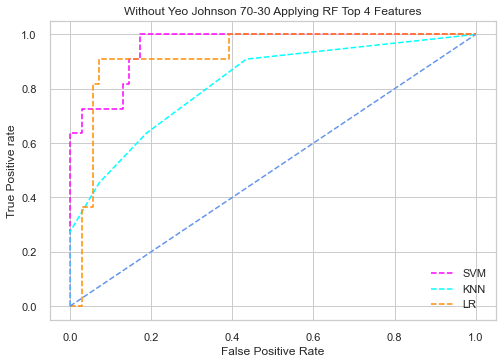

In [54]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sb.set_theme(style = 'whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'magenta', label = 'SVM')
plt.plot(fpr7, tpr7, linestyle = '--', color = 'cyan', label = 'KNN')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'darkorange', label = 'LR')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'cornflowerblue')
# title
plt.title('Without Yeo Johnson 70-30 Applying RF Top 4 Features')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig("../Final ROC Without YJ/Without Yeo Johnson 70-30 Applying RF Top 4 Features.png", dpi=300)

plt.show();